In [1]:
import torch

# Ints

In [2]:
2**31

2147483648

In [3]:
torch.tensor(2**31, dtype=torch.int64)

tensor(2147483648)

In [4]:
# torch.tensor(2**31, dtype=torch.int32)    # RunTime (overflow)

In [5]:
x = torch.tensor(2**31-1, dtype=torch.int32)
x

tensor(2147483647, dtype=torch.int32)

In [6]:
small = x + 1   # overflow: add to the biggest number, it wraps around to the smallest number
small

tensor(-2147483648, dtype=torch.int32)

In [7]:
small - 1 # underflow: wrap around to the biggest

tensor(2147483647, dtype=torch.int32)

# Floats

In [8]:
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

In [9]:
big = sys.float_info.max
big

1.7976931348623157e+308

In [10]:
small = -big
small

-1.7976931348623157e+308

#2 * big

In [11]:
2 * small

-inf

In [12]:
(2*big) + (4*small)

nan

In [13]:
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

In [14]:
# guaranteed 15 decimal points of precision (sys_info.dig)
x = 1.234567812345678
y = 1.234567812345678
x == y

True

# can't handle this level of precision
x = 1.2345678123456780
y = 1.2345678123456781
x == y

# Matrices, and Operations on Them

In [16]:
torch.tensor(3.14)

tensor(3.1400)

In [18]:
torch.rand(1)

tensor([0.2248])

In [38]:
torch.manual_seed(41)
A = torch.rand(10, 3)
A

tensor([[0.2364, 0.2266, 0.8005],
        [0.1692, 0.2650, 0.7720],
        [0.1282, 0.7452, 0.8045],
        [0.6357, 0.5896, 0.6933],
        [0.8782, 0.5407, 0.1400],
        [0.9613, 0.8666, 0.4884],
        [0.2077, 0.3063, 0.0585],
        [0.8314, 0.4566, 0.8445],
        [0.6883, 0.4008, 0.1803],
        [0.6740, 0.1792, 0.3889]])

In [39]:
A.dtype

torch.float32

In [40]:
A.shape

torch.Size([10, 3])

In [41]:
# is it in main memory, or on a GPU?
A.device

device(type='cpu')

In [43]:
A.element_size() * A.nelement()

120

In [49]:
# how to change these aspects?
A = torch.rand(10, 3, dtype=torch.float64)
if torch.cuda.is_available():
    print("on GPU")
    A = A.to("cuda")
A

tensor([[0.4619, 0.0529, 0.8946],
        [0.5638, 0.6201, 0.8991],
        [0.9757, 0.8736, 0.1303],
        [0.4317, 0.1344, 0.8925],
        [0.4261, 0.6207, 0.2141],
        [0.4289, 0.6583, 0.4045],
        [0.2269, 0.0071, 0.1941],
        [0.9028, 0.4221, 0.9749],
        [0.9309, 0.4400, 0.4250],
        [0.6707, 0.8044, 0.7483]], dtype=torch.float64)

In [53]:
A.reshape(2, 15)

tensor([[0.4619, 0.0529, 0.8946, 0.5638, 0.6201, 0.8991, 0.9757, 0.8736, 0.1303,
         0.4317, 0.1344, 0.8925, 0.4261, 0.6207, 0.2141],
        [0.4289, 0.6583, 0.4045, 0.2269, 0.0071, 0.1941, 0.9028, 0.4221, 0.9749,
         0.9309, 0.4400, 0.4250, 0.6707, 0.8044, 0.7483]], dtype=torch.float64)

In [56]:
A.to(torch.float64)

tensor([[0.4619, 0.0529, 0.8946],
        [0.5638, 0.6201, 0.8991],
        [0.9757, 0.8736, 0.1303],
        [0.4317, 0.1344, 0.8925],
        [0.4261, 0.6207, 0.2141],
        [0.4289, 0.6583, 0.4045],
        [0.2269, 0.0071, 0.1941],
        [0.9028, 0.4221, 0.9749],
        [0.9309, 0.4400, 0.4250],
        [0.6707, 0.8044, 0.7483]], dtype=torch.float64)

In [54]:
A.reshape(2, -1)  # -1 means however long necessary to make it work

tensor([[0.4619, 0.0529, 0.8946, 0.5638, 0.6201, 0.8991, 0.9757, 0.8736, 0.1303,
         0.4317, 0.1344, 0.8925, 0.4261, 0.6207, 0.2141],
        [0.4289, 0.6583, 0.4045, 0.2269, 0.0071, 0.1941, 0.9028, 0.4221, 0.9749,
         0.9309, 0.4400, 0.4250, 0.6707, 0.8044, 0.7483]], dtype=torch.float64)

In [57]:
A.shape

torch.Size([10, 3])

In [60]:
# flip rows+columns
A.T.shape

torch.Size([3, 10])

# Calculations

* elementwise operations
* sigmoid
* matrix multiplication

In [61]:
A

tensor([[0.4619, 0.0529, 0.8946],
        [0.5638, 0.6201, 0.8991],
        [0.9757, 0.8736, 0.1303],
        [0.4317, 0.1344, 0.8925],
        [0.4261, 0.6207, 0.2141],
        [0.4289, 0.6583, 0.4045],
        [0.2269, 0.0071, 0.1941],
        [0.9028, 0.4221, 0.9749],
        [0.9309, 0.4400, 0.4250],
        [0.6707, 0.8044, 0.7483]], dtype=torch.float64)

In [64]:
A + 100 # element-wise: add 100 to each value in A

tensor([[100.4619, 100.0529, 100.8946],
        [100.5638, 100.6201, 100.8991],
        [100.9757, 100.8736, 100.1303],
        [100.4317, 100.1344, 100.8925],
        [100.4261, 100.6207, 100.2141],
        [100.4289, 100.6583, 100.4045],
        [100.2269, 100.0071, 100.1941],
        [100.9028, 100.4221, 100.9749],
        [100.9309, 100.4400, 100.4250],
        [100.6707, 100.8044, 100.7483]], dtype=torch.float64)

In [67]:
torch.sigmoid(torch.tensor(0.0))   # 0 => 0.5

tensor(0.5000)

In [69]:
torch.sigmoid(torch.tensor(5))

tensor(0.9933)

In [70]:
torch.sigmoid(torch.tensor(-5))

tensor(0.0067)

In [72]:
A

tensor([[0.4619, 0.0529, 0.8946],
        [0.5638, 0.6201, 0.8991],
        [0.9757, 0.8736, 0.1303],
        [0.4317, 0.1344, 0.8925],
        [0.4261, 0.6207, 0.2141],
        [0.4289, 0.6583, 0.4045],
        [0.2269, 0.0071, 0.1941],
        [0.9028, 0.4221, 0.9749],
        [0.9309, 0.4400, 0.4250],
        [0.6707, 0.8044, 0.7483]], dtype=torch.float64)

In [71]:
torch.sigmoid(A)

tensor([[0.6135, 0.5132, 0.7098],
        [0.6373, 0.6502, 0.7108],
        [0.7263, 0.7055, 0.5325],
        [0.6063, 0.5335, 0.7094],
        [0.6049, 0.6504, 0.5533],
        [0.6056, 0.6589, 0.5998],
        [0.5565, 0.5018, 0.5484],
        [0.7115, 0.6040, 0.7261],
        [0.7172, 0.6083, 0.6047],
        [0.6617, 0.6909, 0.6788]], dtype=torch.float64)

In [73]:
# matrix multiplication

In [78]:
# @ is matrix multiplication
# rule 1: column count of a matrix must equals row count of the next (when multiplying)
# rule 2: final row count equals that of first matrix, final col count equals that of last matrix
x = torch.rand(8, 4)
y = torch.rand(4, 99)
z = torch.rand(99, 2)
x @ y @ z

tensor([[69.9252, 58.0583],
        [84.8328, 71.6229],
        [84.9797, 71.1988],
        [60.2962, 51.1808],
        [79.4668, 66.3478],
        [49.3024, 40.9314],
        [39.5730, 32.6961],
        [39.3272, 32.8599]])

# Linear Model

In [81]:
# goal: make some kind of prediction for each of the 10 rows
data = torch.rand(10, 3)
data

tensor([[0.5208, 0.9003, 0.5818],
        [0.7083, 0.6776, 0.7422],
        [0.5805, 0.4054, 0.5283],
        [0.5744, 0.5741, 0.9073],
        [0.6367, 0.6616, 0.3208],
        [0.3647, 0.0449, 0.0910],
        [0.7361, 0.6446, 0.8611],
        [0.1919, 0.0146, 0.0866],
        [0.9115, 0.7181, 0.0320],
        [0.4487, 0.2182, 0.6392]])

In [95]:
# goal: make 5 predictions for each row
model = torch.nn.Linear(3, 1)
model

Linear(in_features=3, out_features=1, bias=True)

In [96]:
print(model.weight.T.shape)
model.weight.T

torch.Size([3, 1])


tensor([[0.3242],
        [0.4785],
        [0.2802]], grad_fn=<PermuteBackward0>)

In [97]:
model.bias

Parameter containing:
tensor([-0.0009], requires_grad=True)

In [100]:
data @ model.weight.T + model.bias

tensor([[0.7617],
        [0.7609],
        [0.5293],
        [0.7143],
        [0.6119],
        [0.1643],
        [0.7874],
        [0.0925],
        [0.6471],
        [0.4281]], grad_fn=<AddBackward0>)

In [102]:
# model is a "callable" object, meaning it works like function
model(data)

tensor([[0.7617],
        [0.7609],
        [0.5293],
        [0.7143],
        [0.6119],
        [0.1643],
        [0.7874],
        [0.0925],
        [0.6471],
        [0.4281]], grad_fn=<AddmmBackward0>)

In [108]:
class Mult:
    def __init__(self, factor):
        self.factor = factor
        
    def __call__(self, number):
        return number * self.factor
        
double = Mult(2)
double(10)

20

In [109]:
triple = Mult(3)
triple(5)

15

# Optimization

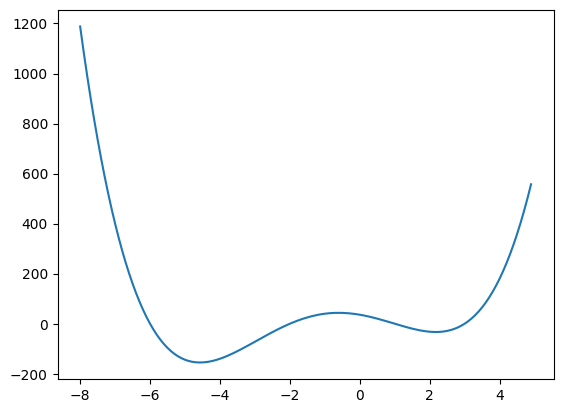

In [111]:
import matplotlib.pyplot as plt

def f(x):
    return (x - 1) * (x + 2) * (x - 3) * (x + 6)

x = torch.arange(-8, 5, 0.1)
y = f(x)
plt.plot(x, y)
# optimization could be minimization or maximization
# goal: choose x that minimizes y

In [117]:
x = torch.tensor(0.0, requires_grad=True)
y = f(x)
# z = g(x)
y.backward()
y

tensor(36., grad_fn=<MulBackward0>)

In [118]:
# gradient is the slope at particular location
x.grad

tensor(-24.)

In [121]:
x = torch.tensor(0.0, requires_grad=True)
optimizer = torch.optim.SGD([x], lr=0.1)   # lr is learning rate
y = f(x)
# z = g(x)
y.backward()
print("y", y)
print("x.grad", x.grad)
optimizer.step()    # make a small change to the variables being optimized, based on the gradient
print("new x", x)
y = f(x)
print("new y", y)

y tensor(36., grad_fn=<MulBackward0>)
x.grad tensor(-24.)
new x tensor(2.4000, requires_grad=True)
new y tensor(-31.0464, grad_fn=<MulBackward0>)


y tensor(36., grad_fn=<MulBackward0>)
y tensor(29.3194, grad_fn=<MulBackward0>)
y tensor(18.2556, grad_fn=<MulBackward0>)
y tensor(2.5687, grad_fn=<MulBackward0>)


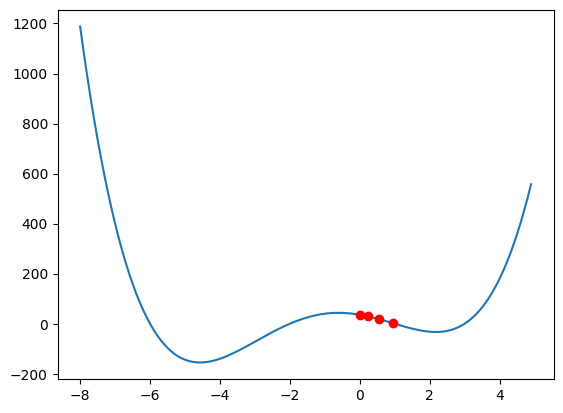

In [128]:
x = torch.arange(-8, 5, 0.1)
y = f(x)
plt.plot(x, y)



x = torch.tensor(0.0, requires_grad=True)
optimizer = torch.optim.SGD([x], lr=0.01)   # lr is learning rate

for epoch in range(4):
    y = f(x)
    plt.plot(x.detach(), y.detach(), "ro")
    y.backward()
    print("y", y)
    optimizer.step()    # doesn't set the grad, it adds to x.grad
    optimizer.zero_grad()   # set x.grad = 0 before the next loop